# CM3070, Final Project

```
University of London
BSc Computer Science
CM3070, Final Project
Hudson Leonardo MENDES
hlm12@student.london.ac.uk
```


## 1. Introduction


### 1.1. Domain-specific Area


### 1.2. Dataset

**Multimodal EmotionLines Dataset(MELD)**[2, 3]

> Multimodal EmotionLines Dataset (MELD) has been created by enhancing and extending EmotionLines dataset. MELD contains the same dialogue instances available in EmotionLines, but it also encompasses audio and visual modality along with text. MELD has more than 1400 dialogues and 13000 utterances from Friends TV series. Multiple speakers participated in the dialogues. Each utterance in a dialogue has been labeled by any of these seven emotions -- Anger, Disgust, Sadness, Joy, Neutral, Surprise and Fear. MELD also has sentiment (positive, negative and neutral) annotation for each utterance.
> (Hakim, 2021)


### 1.3. Objective


## 2. Environment


### 2.1. Dependencies


In [1]:
!cat ../setup.cfg

[metadata]
name = hlm12erc
version = attr: hlm12erc.VERSION
author = Hudson Mendes
author_email = hlm12@student.london.ac.uk
description = Final Project from University of London
long_description = file: README.md, LICENSE
keywords = university-of-london
license = copyright

[options]
zip_safe = False
include_package_data = True
packages = find:
package_dir =
    =src
python_requires = >=3.10
install_requires =
    torch>=2.0.1
    torchtext>=0.15.2
    torchvision>=0.15.2
    transformers>=4.30.2
    nltk>=3.8.1
    Pillow>=10.0.0
    scikit-learn>=1.3.0

[options.package_data]

[options.extras_require]
# development
dev =
    pre-commit>=3.3.3
    black[jupyter]>=23.7.0
    isort>=5.12.0

test =
    pytest>=7.4.0

# mlops
etl =
    # extract, transformation & loading
    kaggle>=1.5.13
    tqdm>=4.65.0
    pandas>=2.0.1
    google-cloud-storage>=2.10.0
    moviepy>=1.0.3

modelling =
    # exploratory data analysis, and model design
    gensim
    tensorflow
    tensorflow-hub
    ma

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import logging

logging.basicConfig(level=logging.INFO)

In [4]:
import nltk

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hudsonmendes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hudsonmendes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


### Paths & Locations

In [5]:
import pathlib

dir_data = pathlib.Path("../data")

## 3. Exploratory Data Analysis


### 3.1. Data Extraction, Transformation & Loading


In [6]:
%%capture
%pip install -e '..[etl]'

#### 3.1.1. [E]xtraction


In [7]:
from hlm12erc.etl import ETL, KaggleDataset

ds_kaggle = KaggleDataset(owner="zaber666", name="meld-dataset", subdir="MELD-RAW/MELD.Raw")
etl = ETL(dataset=ds_kaggle).into(uri_or_folderpath=dir_data)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:hlm12erc.etl:Kaggle dataset: zaber666/meld-dataset
INFO:hlm12erc.etl:Workspace set to: /tmp/hlm12erc/etl
INFO:hlm12erc.etl:Dataset already loaded into ../data, skipping (use force=True to force re-load).


In [8]:
!ls {str(dir_data)} | head -n 10

d-0-seq-0.png
d-0-seq-0.wav
d-0-seq-1.png
d-0-seq-1.wav
d-0-seq-10.png
d-0-seq-10.wav
d-0-seq-11.png
d-0-seq-11.wav
d-0-seq-12.png
d-0-seq-12.wav


In [9]:
import pandas as pd

df_raw = pd.read_csv("../data/train.csv", index_col=0)
df_raw

,dialogue,sequence,speaker,x_text,x_visual,x_audio,label
0,0,0,Chandler,also I was the point person on my companys tr...,d-0-seq-0.png,d-0-seq-0.wav,neutral
1,0,1,The Interviewer,You mustve had your hands full.,d-0-seq-1.png,d-0-seq-1.wav,neutral
2,0,2,Chandler,That I did. That I did.,d-0-seq-2.png,d-0-seq-2.wav,neutral
3,0,3,The Interviewer,So lets talk a little bit about your duties.,d-0-seq-3.png,d-0-seq-3.wav,neutral
4,0,4,Chandler,My duties? All right.,d-0-seq-4.png,d-0-seq-4.wav,surprise
...,...,...,...,...,...,...,...
9984,1038,13,Chandler,You or me?,d-1038-seq-13.png,d-1038-seq-13.wav,neutral
9985,1038,14,Ross,"I got it. Uh, Joey, women don't have Adam's ap...",d-1038-seq-14.png,d-1038-seq-14.wav,neutral
9986,1038,15,Joey,"You guys are messing with me, right?",d-1038-seq-15.png,d-1038-seq-15.wav,surprise
9987,1038,16,All,Yeah.,d-1038-seq-16.png,d-1038-seq-16.wav,neutral


#### 3.1.2. [T]ransformation (Data Cleaning)


#### 3.1.2. [L]oading


### 3.2. Statistical Analysis


#### 3.2.1. Measures of Spread


#### 3.2.2. Types of Distribution


### 3.3. Data Visualization


#### 3.3.1. Wordclouds (with & without Stopwords)


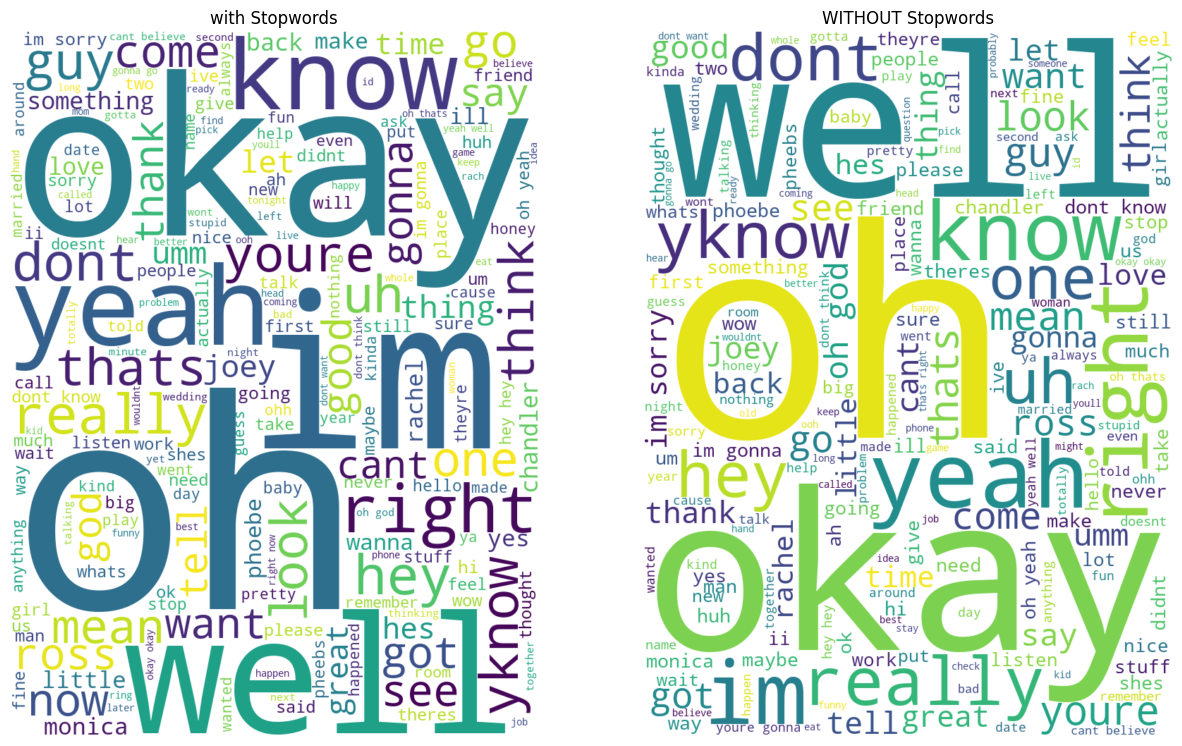

In [10]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Get the list of stopwords
stop_words = set(stopwords.words("english"))

# Combine all text into a single string and remove special chars
text = re.sub(r"[^\w\s\d]", "", " ".join(df_raw.x_text.tolist()).lower())

# Generate the word cloud with stopwords
wordcloud_with_stopwords = WordCloud(width=750, height=1000, background_color="white").generate(text)

# Remove stopwords from the text
text_without_stopwords = " ".join([word for word in text.split() if word not in stop_words])

# Generate the word cloud without stopwords
wordcloud_without_stopwords = WordCloud(width=750, height=1000, background_color="white").generate(
    text_without_stopwords
)

# Display the word clouds side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(wordcloud_with_stopwords, interpolation="bilinear")
axs[0].set_title("with Stopwords")
axs[0].axis("off")
axs[1].imshow(wordcloud_without_stopwords, interpolation="bilinear")
axs[1].set_title("WITHOUT Stopwords")
axs[1].axis("off")
plt.show()

#### 3.3.2. Sentence Length Distribution

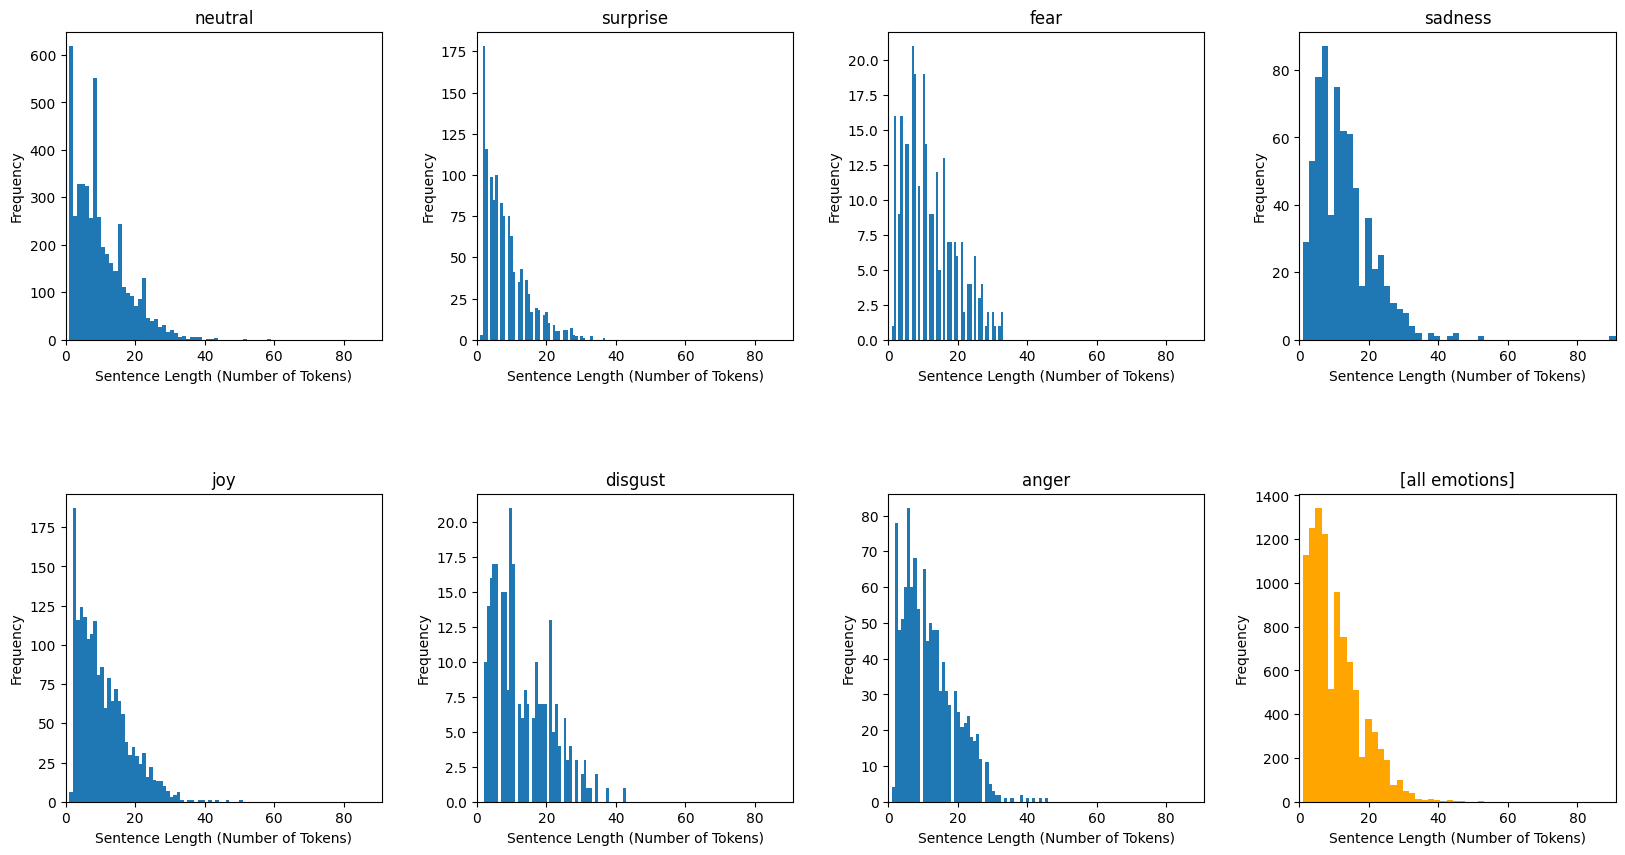

In [11]:
import matplotlib.pyplot as plt
import nltk

# Tokenize the sentences using the nltk tokenizer
df_raw["tokens"] = df_raw["x_text"].apply(nltk.word_tokenize)
df_raw["sentence_length"] = df_raw["tokens"].apply(len)

# Get the unique emotion labels
labels = df_raw["label"].unique()

# Create a grid of histograms
num_rows = (len(labels) + 3) // 4
fig, axs = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
for i, label in enumerate(labels):
    # Filter the data by label
    data = df_raw[df_raw["label"] == label]["sentence_length"]

    # Plot the histogram
    axs[i // 4, i % 4].hist(data, bins=50)
    axs[i // 4, i % 4].set_title(label)
    axs[i // 4, i % 4].set_xlabel("Sentence Length (Number of Tokens)")
    axs[i // 4, i % 4].set_ylabel("Frequency")

    # Set the x-axis limit to the maximum sentence length
    axs[i // 4, i % 4].set_xlim([0, df_raw["sentence_length"].max()])

# Plot the combined distribution
data = df_raw["sentence_length"]
axs[-1, -1].hist(data, bins=50, color="orange")
axs[-1, -1].set_title("[all emotions]")
axs[-1, -1].set_xlabel("Sentence Length (Number of Tokens)")
axs[-1, -1].set_ylabel("Frequency")
axs[-1, -1].set_xlim([0, df_raw["sentence_length"].max()])

# Remove the unused subplots
for i in range(len(labels) + 1, num_rows * 4):
    axs.flat[i].set_visible(False)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Show the plot
plt.show()

#### 3.3.3. LDA-based Topic Modelling

In [12]:
import logging
import pyLDAvis.gensim_models
import gensim
import nltk
import re
from nltk.corpus import stopwords

# Set the logging level to WARNING
gensim.models.ldamodel.logger.setLevel(logging.WARNING)

# Tokenize the sentences using the nltk tokenizer, lowercase them, remove special chars and remove stopwords
stop_words = set(stopwords.words("english"))
utterances = [re.sub(r"[^\w\s\d]", "", utterance) for utterance in df_raw["x_text"]]
tokens = [nltk.word_tokenize(x) for x in utterances]
tokens = [[word.lower() for word in sentence] for sentence in tokens]
tokens = [[word for word in sentence if word not in stop_words] for sentence in tokens]

# Create a dictionary from the tokens
dictionary = gensim.corpora.Dictionary(tokens)

# Create a bag-of-words corpus from the dictionary and tokens
corpus = [dictionary.doc2bow(sentence) for sentence in tokens]

# Train the LDA model on the corpus
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    random_state=42,
    passes=10,
    per_word_topics=True,
)

# Create an interactive visualization of the topics and their associated keywords
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:built Dictionary<5762 unique tokens: ['also', 'companys', 'gr6', 'kl5', 'person']...> from 9989 documents (total 42452 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<5762 unique tokens: ['also', 'companys', 'gr6', 'kl5', 'person']...> from 9989 documents (total 42452 corpus positions)", 'datetime': '2023-07-31T15:57:06.994167', 'gensim': '4.3.1', 'python': '3.10.11 (main, Jun  6 2023, 22:40:11) [Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-12.6.8-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.utils:LdaModel lifecycle event {'msg': 'trained LdaModel<num_terms=5762, num_topics=10, decay=0.5, chunksize=2000> in 34.86s', 'datetime': '2023-07-31T15:57:42.088870', 'gensim': '4.3.1', 'python': '3.10.11 (main, Jun  6 2023, 22:40:11) [Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-12.6.8-x86_64-i386-64bit', 'even

#### 3.3.4. Utterances 3D Sphere based in USE4

In [20]:
def plot_3d_embeddings_using(
    ax,
    title: str,
    embedding_fn: callable,
    batch_size: int,
):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA
    from tqdm import tqdm

    # Get the embeddings for each utterance in df_raw.x_text
    embeddings = []
    for i in tqdm(range(0, len(df_raw.x_text), batch_size), desc=title):
        batch = list(df_raw.x_text[i : i + batch_size])
        batch = embedding_fn(batch)
        embeddings.append(batch)
    embeddings = np.concatenate(embeddings, axis=0)

    # Perform PCA on the normalized embeddings to reduce them to 3 dimensions
    pca = PCA(n_components=3)
    pca_embeddings = pca.fit_transform(embeddings)

    # Normalize the embeddings to lie on the surface of the unit sphere
    norms = np.linalg.norm(pca_embeddings, axis=1, keepdims=True)
    normalized_embeddings = pca_embeddings / norms

    # Create a 3D scatter plot of the PCA embeddings, color-coded by label
    colors = dict(
        neutral="gray",
        surprise="yellow",
        fear="black",
        sadness="blue",
        joy="green",
        disgust="purple",
        anger="red",
    )
    for i, label in enumerate(tqdm(list(df_raw.label), desc="scatter")):
        ax.scatter(
            normalized_embeddings[i, 0],
            normalized_embeddings[i, 1],
            normalized_embeddings[i, 2],
            c=colors[label],
        )

    ax.set_title(title)
    plt.show()

INFO:absl:Fingerprint not found. Saved model loading will continue.
scatter: 100%|██████████| 9989/9989 [01:24<00:00, 118.23it/s]


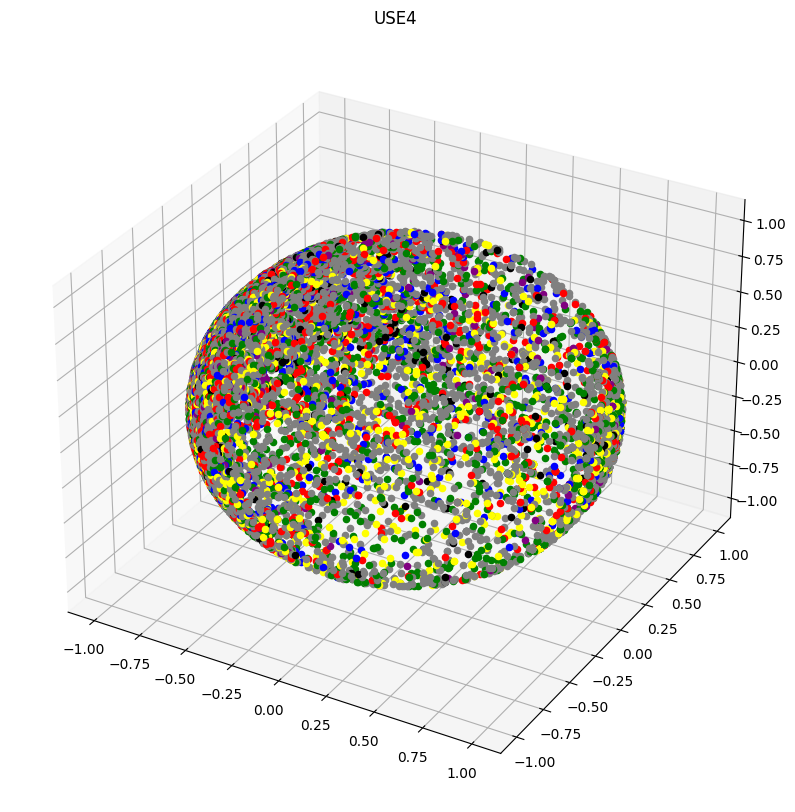

In [21]:
import tensorflow_hub as hub
import torch
from transformers import AutoTokenizer, AutoModel

# USE4 Embeddings
embedding_fn_use4 = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# SimCSE Embeddings
simcse_model_name = "ZurichNLP/unsup-simcse-xlm-roberta-base"
simcse_tokenizer = AutoTokenizer.from_pretrained(simcse_model_name)
simcse_model = AutoModel.from_pretrained(simcse_model_name)
def embedding_fn_simcse(x):
    inputs = simcse_tokenizer(x, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        outputs = simcse_model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :]
    return embeddings.numpy()


fig = plt.figure(figsize=(10, 10))
axs = fig.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
plot_3d_embeddings_using(axs[0], title="USE4", embedding_fn=embedding_fn_use4, batch_size=64)
plot_3d_embeddings_using(axs[1], title="SimCSE", embedding_fn=embedding_fn_simcse, batch_size=8)

scatter: 100%|██████████| 9989/9989 [01:06<00:00, 151.25it/s]


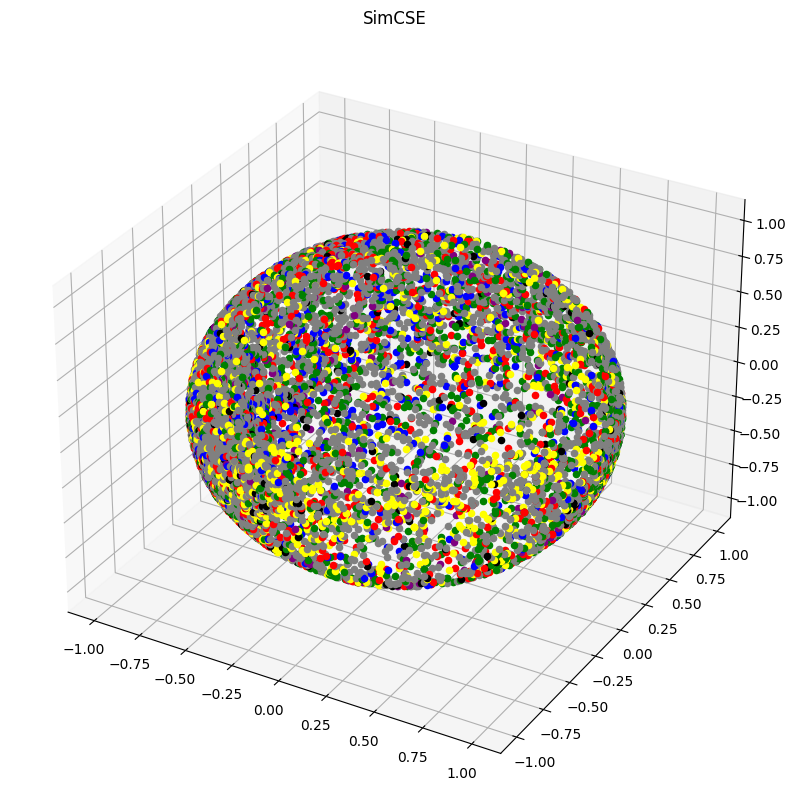

#### 3.3.X. Image Grid & Scatter Plot


#### 3.3.X. Audio Feature Plots


## 4. Machine Learning

**Universal Machine-learning Workflow**[1]


### 4.1. Problem Definition


### 4.2. Measure of Success


### 4.3. Evaluation Protocol


### 4.4. Data Preparation


### 4.5. Baseline Model


### 4.6. Overfitting Model


### 4.7. Model Tuning


## 5. Results


## 6. Conclusions


## References

[1] Chollet, François. Deep Learning with Python. Manning, 2017.

[2] Poria, Soujanya, et al. ‘MELD: A Multimodal Multi-Party Dataset for Emotion Recognition in Conversations’. ArXiv [Cs.CL], 2019, http://arxiv.org/abs/1810.02508. arXiv.

[3] Chen, Sheng-Yeh, et al. ‘EmotionLines: An Emotion Corpus of Multi-Party Conversations’. ArXiv [Cs.CL], 2018, http://arxiv.org/abs/1802.08379. arXiv.

[4] Su, Lin, et al. ‘GEM: A General Evaluation Benchmark for Multimodal Tasks’. ArXiv [Cs.CL], 2021, http://arxiv.org/abs/2106.09889. arXiv.
